5.187377517639621
Simulated Record Highs: 5.19011
Theoretical Record Highs: 5.187


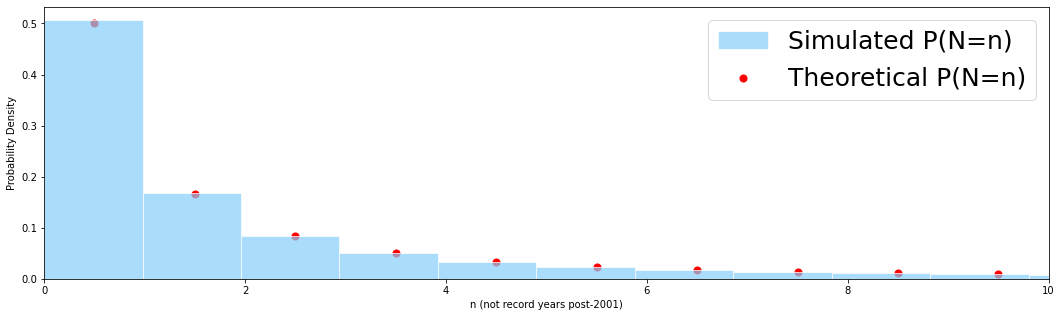

In [2]:
#PROBLEM 1: EXTREME TEMPERATURES 

#1.1: Expected Value
#using: https://localcoder.org/how-to-do-a-sigma-in-python-3

#Using Python to solve the sigma problem for 1.1
from functools import reduce
result = reduce(lambda a, x: a + x**(-1), [0]+list(range(1,100+1)))
print(result)


#1.3: Simulation 
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import random 

#checking 1.1
trials = 100000
rec = []
Nrec = []

for t in range(trials): 
    #generating random values for X_1 to X_100
    annual_temp = [random.random() for _ in range(0, 100)]
    #2001 is a record, this is our starting point 
    record_H = 1
    current_H = annual_temp[0]
    for i in range(1, len(annual_temp)):
        if annual_temp[i] > current_H:
            record_H += 1 
            if record_H == 2: 
                Nrec.append(i-1)
            current_H = annual_temp[i]
    #setting our new high :)
    rec.append(record_H)

print("Simulated Record Highs:", sum(rec)/trials)
print("Theoretical Record Highs: 5.187")
    
    
#checking 1.2
x_ax = np.arange(1,100,1)
y_ax = []

#PMF for theoretical
for x in x_ax: 
    y_ax.append(1/(x*(x+1)))
    
weights = np.ones_like(Nrec)/len(Nrec)

#plotting figure 
plt.figure(figsize = (18,5))
plt.hist(Nrec, bins=100, weights=weights, color='lightskyblue', 
         alpha=0.7, edgecolor='white', label='Simulated P(N=n)')
plt.scatter((x_ax-0.5), y_ax, s=50, color='red', 
            label='Theoretical P(N=n)')
plt.xlabel('n (not record years post-2001)')
plt.ylabel('Probability Density')
plt.xlim((0, 10))
plt.legend(prop={'size':25})
plt.show()
